# Data Science Internship Project - CodeSoft
##    Task 3 : Iris Flower Classification

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Loading the Dataset

In [3]:
Iris_file_path = 'C:/Users/hp/Downloads/IRIS.csv' 
df = pd.read_csv(Iris_file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

## 3. Data Cleaning and Preprocessing 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(3)

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

In [10]:
df= df.drop_duplicates()

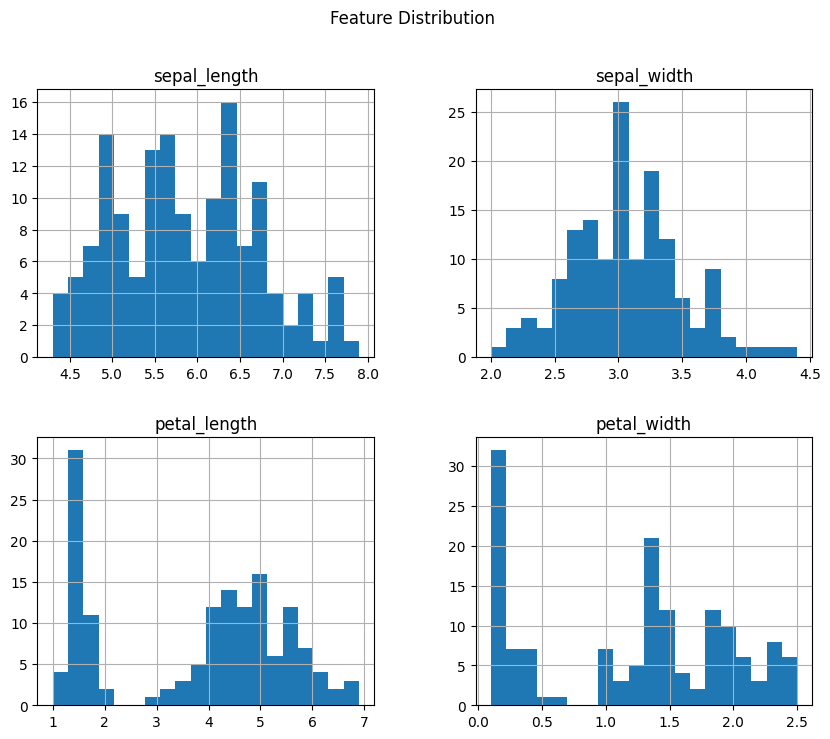

In [11]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].hist(figsize=(10, 8), bins=20)
plt.suptitle('Feature Distribution')
plt.show()

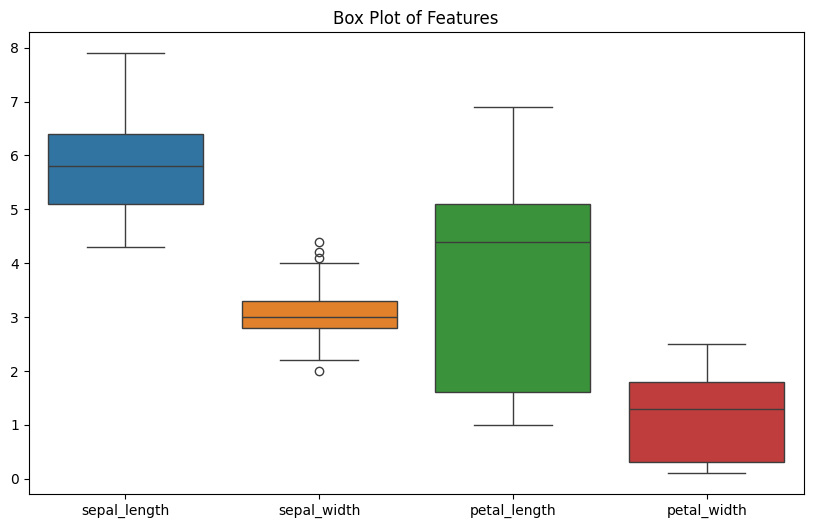

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title('Box Plot of Features')
plt.show()

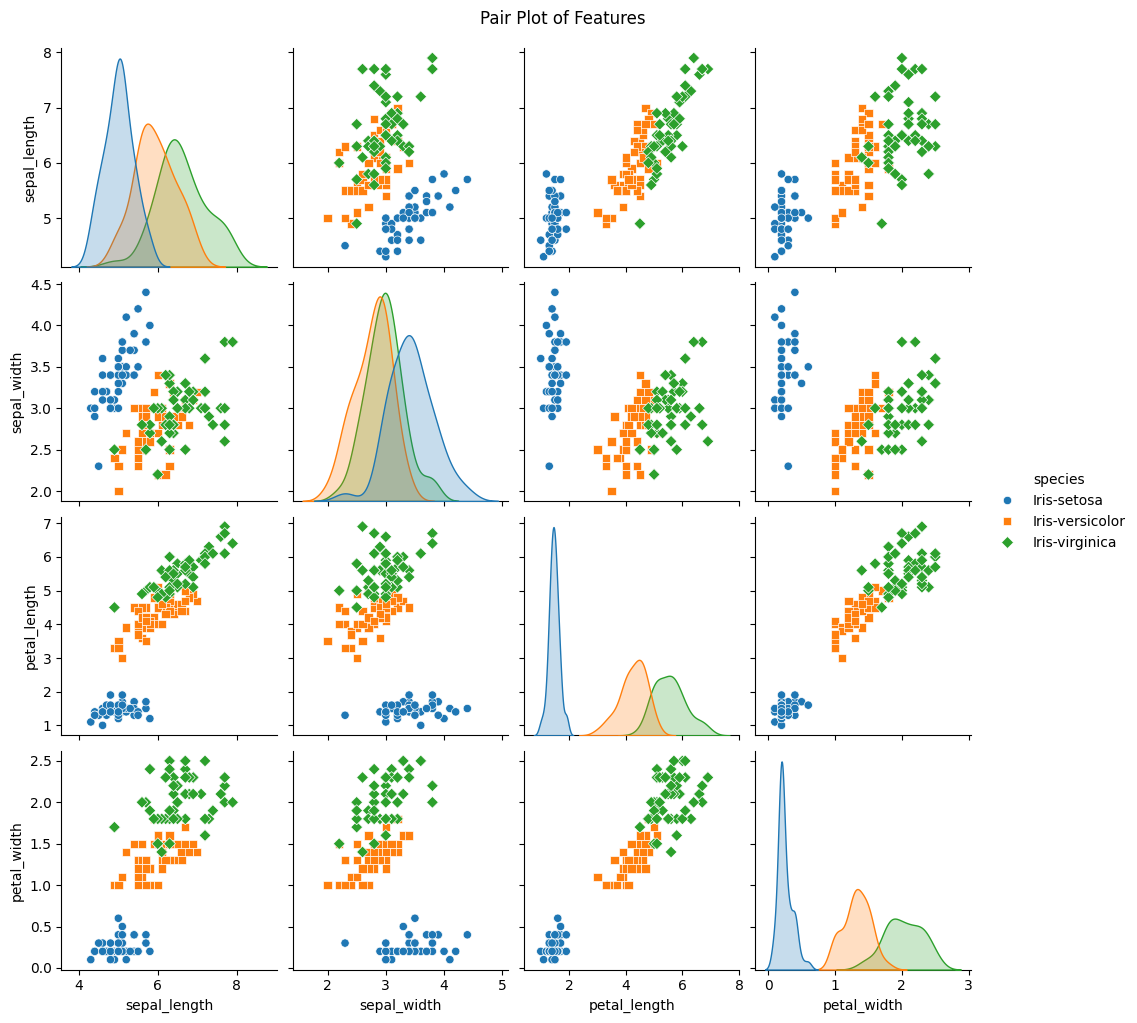

In [13]:
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

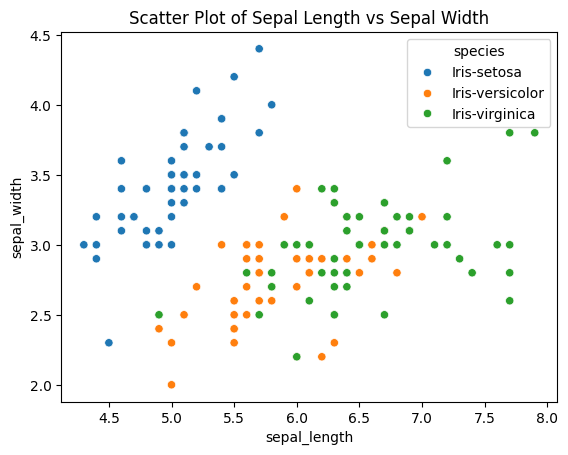

In [14]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

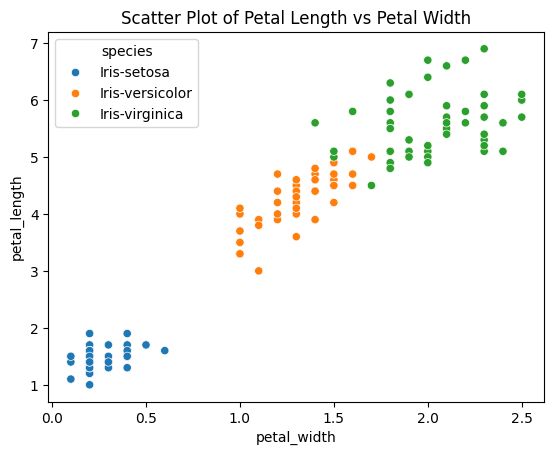

In [15]:
sns.scatterplot(data=df, x="petal_width",y="petal_length",hue="species")
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9980\2884977551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x ='species' ,palette="Dark2")


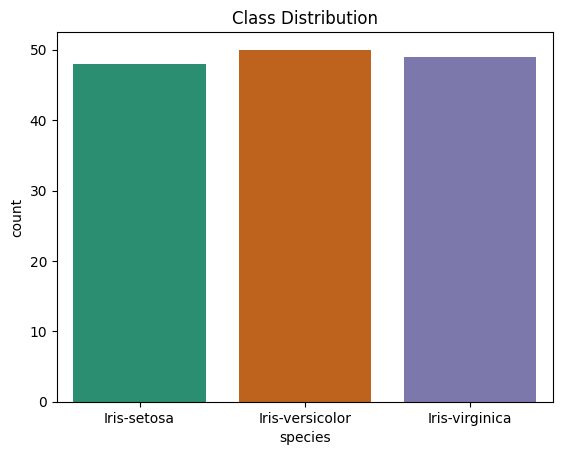

In [17]:
sns.countplot(data=df, x ='species' ,palette="Dark2")
plt.title('Class Distribution')
plt.show()

## 5. Feature Engineering

In [18]:
# Encoding the 'species' feature using LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Data Splitting

In [19]:
y = df['species']  # Target variable 
Iris_features = df.drop('species', axis=1)  # Features to be used for model
X = Iris_features  # Features data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Building

In [21]:
# Initializing the logistic regression model
Iris_model = LogisticRegression()

In [22]:
# Fitting the model to the training data
Iris_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred_test = Iris_model.predict(X_test)

## 8. Model Evaluation

In [24]:
# Model's performance evaluating
accuracy = accuracy_score(y_test, y_pred_test)
print(f' Accuracy for LR: {accuracy:.4f}')
print(classification_report(y_test, y_pred_test))
cf=confusion_matrix(y_test,y_pred_test)


 Accuracy for LR: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



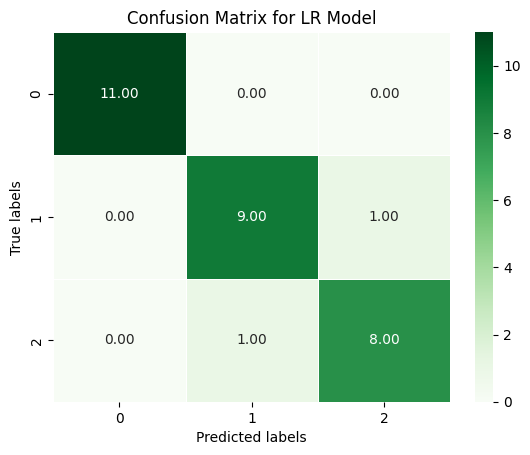

In [25]:
sns.heatmap(cf,annot=True,fmt=".2f",cmap="Greens",linewidth=0.5)
plt.title('Confusion Matrix for LR Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()